# **Text Summarizer and Analyser**

### **Goal : In this project we develop a Pyhton application that :**


*   Reads a text Document(article , paragraph , tweet , ..)
*   returns its category(sport , business..)


*   detects its main topic
*   summarized it automatically to produce most important and relevant sentences in order (2sentences or more )


*   identifies the emotional tone in it positive or negative or neutral








# **Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 1. Reading Data 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import shutil
shutil.copy('/content/drive/My Drive/Text_Mining/bbc-fulltext.zip','/content/sample_data')

'/content/sample_data/bbc-fulltext.zip'

In [4]:
!unzip  /content/sample_data/bbc-fulltext.zip -d /content/sample_data

Archive:  /content/sample_data/bbc-fulltext.zip
   creating: /content/sample_data/bbc/
   creating: /content/sample_data/bbc/business/
  inflating: /content/sample_data/bbc/business/001.txt  
  inflating: /content/sample_data/bbc/business/002.txt  
  inflating: /content/sample_data/bbc/business/003.txt  
  inflating: /content/sample_data/bbc/business/004.txt  
  inflating: /content/sample_data/bbc/business/005.txt  
  inflating: /content/sample_data/bbc/business/006.txt  
  inflating: /content/sample_data/bbc/business/007.txt  
  inflating: /content/sample_data/bbc/business/008.txt  
  inflating: /content/sample_data/bbc/business/009.txt  
  inflating: /content/sample_data/bbc/business/010.txt  
  inflating: /content/sample_data/bbc/business/011.txt  
  inflating: /content/sample_data/bbc/business/012.txt  
  inflating: /content/sample_data/bbc/business/013.txt  
  inflating: /content/sample_data/bbc/business/014.txt  
  inflating: /content/sample_data/bbc/business/015.txt  
  inflatin

In [0]:
from sklearn.datasets import load_files
movie_data = load_files(r"/content/sample_data/bbc",encoding='unicode_escape')
X, y = movie_data.data, movie_data.target

In [6]:
print(X[0])

Tate & Lyle boss bags top award

Tate & Lyle's chief executive has been named European Businessman of the Year by a leading business magazine.

Iain Ferguson was awarded the title by US publication Forbes for returning one of the UK's "venerable" manufacturers to the country's top 100 companies. The sugar group had been absent from the FTSE 100 for seven years until Mr Ferguson helped it return to growth. Tate's shares have leapt 55% this year, boosted by firming sugar prices and sales of its artificial sweeteners.

"After years of a sagging stock price and a seven-year hiatus from the FTSE 100, one of Britain's venerable manufacturers has returned to the vaunted index," Forbes said. Mr Ferguson took the helm at the company in 2003, after spending most of his career at consumer goods giant Unilever. Tate & Lyle, which was an original member of the historic FT-30 index in 1935, operates more than 41 factories and 20 more additional production facilities in 28 countries. Previous winners

In [7]:
print(y)
print(y.shape)

[0 4 2 ... 1 1 3]
(2225,)


# **Task 1 : Getting the category of the article**

# **2.Text Preprocessing**

In [0]:
X1 = X
y1 = y

In [8]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import re
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X1)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

In [21]:
print(documents[0])

tate lyle bos bag top award tate lyle chief executive ha been named european businessman of the year by leading business magazine iain ferguson wa awarded the title by u publication forbes for returning one of the uk venerable manufacturer to the country top 100 company the sugar group had been absent from the ftse 100 for seven year until mr ferguson helped it return to growth tate share have leapt 55 this year boosted by firming sugar price and sale of it artificial sweetener after year of sagging stock price and seven year hiatus from the ftse 100 one of britain venerable manufacturer ha returned to the vaunted index forbes said mr ferguson took the helm at the company in 2003 after spending most of his career at consumer good giant unilever tate lyle which wa an original member of the historic ft 30 index in 1935 operates more than 41 factory and 20 more additional production facility in 28 country previous winner of the forbes award include royal bank of scotland chief executive f

# **3.Sequence Creation**

## **Bag Of Words**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X1 = vectorizer.fit_transform(documents).toarray()

# **Tf-Idf:**

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X1 = tfidfconverter.fit_transform(X1).toarray()

## **4.Splitting the Dataset**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

## **5.Training the model**

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 4, 1, 1, 4, 2, 4, 1, 4, 3, 3, 2, 0, 1, 0, 0, 2, 3, 0, 4, 0,
       0, 3, 4, 3, 4, 2, 3, 0, 1, 3, 4, 0, 4, 2, 4, 1, 1, 0, 3, 4, 4, 4,
       0, 4, 3, 0, 2, 0, 4, 1, 2, 3, 1, 2, 3, 0, 3, 0, 1, 2, 4, 1, 2, 2,
       0, 0, 0, 1, 4, 1, 0, 4, 3, 0, 1, 0, 4, 1, 0, 4, 2, 2, 0, 3, 0, 3,
       2, 3, 0, 3, 0, 1, 4, 4, 2, 0, 1, 4, 0, 2, 4, 2, 3, 1, 1, 0, 3, 2,
       0, 3, 3, 0, 0, 0, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 0, 3, 3, 4, 2,
       4, 1, 2, 0, 3, 2, 1, 1, 1, 1, 1, 3, 4, 3, 4, 3, 4, 4, 3, 1, 4, 0,
       2, 1, 0, 3, 4, 0, 3, 1, 2, 3, 3, 1, 0, 2, 1, 2, 3, 3, 4, 1, 2, 4,
       1, 3, 2, 4, 2, 3, 1, 1, 1, 1, 3, 4, 3, 1, 0, 4, 2, 0, 4, 1, 4, 3,
       3, 4, 4, 0, 1, 2, 0, 0, 1, 0, 4, 3, 0, 4, 3, 0, 1, 3, 0, 0, 3, 3,
       1, 0, 3, 3, 0, 2, 2, 2, 3, 3, 1, 2, 4, 0, 0, 2, 1, 2, 0, 4, 0, 1,
       3, 1, 1, 4, 0, 3, 4, 1, 4, 1, 0, 4, 2, 1, 3, 4, 1, 0, 3, 0, 3, 1,
       3, 2, 4, 3, 3, 4, 3, 2, 4, 3, 0, 3, 2, 3, 2, 0, 3, 4, 3, 1, 2, 3,
       0, 4, 0, 2, 3, 1, 0, 2, 4, 1, 2, 3, 0, 3, 0,

In [0]:
print(y_test)

[0 1 4 1 1 4 2 4 1 4 3 3 2 0 1 0 0 2 3 0 4 0 0 3 4 3 4 2 3 0 1 3 4 0 4 2 0
 1 1 0 3 4 4 4 0 4 3 1 2 2 4 1 2 3 1 0 3 0 3 0 1 2 4 1 2 2 0 0 0 1 4 1 0 4
 3 0 1 0 4 1 0 4 2 0 0 2 0 3 2 3 0 3 2 1 4 4 2 0 1 4 0 2 4 2 3 1 1 0 3 2 0
 3 3 0 0 0 4 3 3 1 1 3 3 1 3 1 3 0 3 3 4 2 0 1 2 0 3 2 1 1 1 1 1 3 4 3 4 3
 4 4 3 1 4 0 2 1 0 3 4 0 3 1 2 3 3 1 0 2 1 2 3 3 4 1 2 4 1 3 2 4 2 3 1 1 1
 1 3 4 3 1 0 4 2 0 4 1 4 3 3 4 4 0 1 2 0 0 1 0 4 3 0 4 3 0 1 3 0 0 3 3 1 0
 3 3 0 2 1 2 3 3 1 2 4 0 0 2 1 2 0 4 2 1 3 1 1 1 0 3 0 1 4 1 0 4 2 1 3 4 1
 0 3 0 3 1 3 2 4 3 3 4 3 2 4 3 0 3 2 3 2 0 3 4 3 1 2 3 0 4 0 2 3 1 0 2 4 1
 2 3 0 3 0 4 2 0 0 3 0 1 2 3 4 3 2 2 2 4 2 4 0 2 2 3 1 4 3 2 3 2 1 0 0 1 0
 2 0 3 3 2 2 1 0 0 1 4 2 0 4 4 3 3 0 4 4 3 4 1 3 4 2 1 1 0 0 1 2 3 3 4 2 4
 1 0 2 3 2 2 3 3 0 0 4 0 0 2 0 0 1 3 0 2 3 2 3 1 0 3 0 4 2 0 0 4 2 2 3 4 1
 1 4 1 0 0 0 4 2 3 3 1 1 2 3 0 3 3 2 0 2 3 1 3 4 0 2 3 1 0 4 2 3 1 0 4 4 0
 4]


## **6.Evaluation**

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 96   0   3   0   3]
 [  2  79   1   1   1]
 [  3   0  74   1   0]
 [  0   0   0 103   0]
 [  0   1   0   1  76]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       102
           1       0.99      0.94      0.96        84
           2       0.95      0.95      0.95        78
           3       0.97      1.00      0.99       103
           4       0.95      0.97      0.96        78

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445

0.9617977528089887


# **Task 2 :Detecting the topic of an article**

In [0]:
X2 = X
y2 = y

## **create vocabulary of all the words in our data**

In [28]:
print(X2[:2])

['Tate & Lyle boss bags top award\n\nTate & Lyle\'s chief executive has been named European Businessman of the Year by a leading business magazine.\n\nIain Ferguson was awarded the title by US publication Forbes for returning one of the UK\'s "venerable" manufacturers to the country\'s top 100 companies. The sugar group had been absent from the FTSE 100 for seven years until Mr Ferguson helped it return to growth. Tate\'s shares have leapt 55% this year, boosted by firming sugar prices and sales of its artificial sweeteners.\n\n"After years of a sagging stock price and a seven-year hiatus from the FTSE 100, one of Britain\'s venerable manufacturers has returned to the vaunted index," Forbes said. Mr Ferguson took the helm at the company in 2003, after spending most of his career at consumer goods giant Unilever. Tate & Lyle, which was an original member of the historic FT-30 index in 1935, operates more than 41 factories and 20 more additional production facilities in 28 countries. Pre

In [0]:
import numpy as np
myarray = np.asarray(X2)


In [30]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(myarray)
doc_term_matrix

<2225x17472 sparse matrix of type '<class 'numpy.int64'>'
	with 308605 stored elements in Compressed Sparse Row format>

## **Use the LDA**

In [31]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [32]:
import random
#fetches 10 words from our vocabulary
for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

parody
hooked
navy
lancaster
payments
racer
zillion
protecting
separating
674


In [33]:
first_topic = LDA.components_[0]
first_topic

array([  3.45603771, 170.88101497,  41.1805826 , ...,   0.21961147,
         0.20000011,   0.21125222])

In [0]:
top_topic_words = first_topic.argsort()[-10:]
top_topic_words

array([ 6928, 15662, 16292, 10392, 17386, 10773,  2177, 10601,  6422,
       11614])

In [0]:
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

games
technology
tv
mobile
year
new
best
music
film
people


In [34]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['games', 'technology', 'tv', 'mobile', 'year', 'new', 'best', 'music', 'film', 'people']


Top 10 words for topic #1:
['new', 'brown', 'minister', 'blair', 'party', 'election', 'people', 'labour', 'government', 'mr']


Top 10 words for topic #2:
['000', 'economic', 'world', '2004', 'economy', 'new', 'sales', 'growth', 'market', 'year']


Top 10 words for topic #3:
['players', 'team', 'wales', 'play', 'world', 'win', 'time', 'england', 'year', 'game']


Top 10 words for topic #4:
['legal', 'yukos', 'people', 'court', 'security', 'new', 'software', 'firm', 'company', 'mr']




In [35]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(2225, 5)

# **Task3 ; Article summarization:**

In [0]:
X3 = X
y3 = y

## **1.Preprocessing**

In [0]:
# Removing Square Brackets and Extra Spaces
for sen in X3:
  sen = re.sub(r'\[[0-9]*\]', ' ', sen)
  sen = re.sub(r'\s+', ' ', sen)

In [39]:
print(X3[0])
article_text = X3

Tate & Lyle boss bags top award

Tate & Lyle's chief executive has been named European Businessman of the Year by a leading business magazine.

Iain Ferguson was awarded the title by US publication Forbes for returning one of the UK's "venerable" manufacturers to the country's top 100 companies. The sugar group had been absent from the FTSE 100 for seven years until Mr Ferguson helped it return to growth. Tate's shares have leapt 55% this year, boosted by firming sugar prices and sales of its artificial sweeteners.

"After years of a sagging stock price and a seven-year hiatus from the FTSE 100, one of Britain's venerable manufacturers has returned to the vaunted index," Forbes said. Mr Ferguson took the helm at the company in 2003, after spending most of his career at consumer goods giant Unilever. Tate & Lyle, which was an original member of the historic FT-30 index in 1935, operates more than 41 factories and 20 more additional production facilities in 28 countries. Previous winners

In [0]:
# Removing special characters and digits
formatted_article_text=[]
for sen in X3:
    formatted_article_text.append(re.sub('[^a-zA-Z]', ' ', sen ))
    formatted_article_text.append(re.sub(r'\s+', ' ', sen))

## **2.Text to sentences**

In [41]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
sentence_list = []
for sen in  article_text:
   sentence_list.append(nltk.sent_tokenize(sen))

## **3.Find Weighted Frequency of Occurrence**

In [0]:
stopwords = nltk.corpus.stopwords.words('english')

word_frequencies = {}
for sen in formatted_article_text:
  for word in nltk.word_tokenize(sen):
    if word not in stopwords:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1

In [0]:
maximum_frequncy = max(word_frequencies.values())

for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

## **4.Calculating Sentence Scores**

In [0]:
sentence_list[:10]

[["Tate & Lyle boss bags top award\n\nTate & Lyle's chief executive has been named European Businessman of the Year by a leading business magazine.",
  'Iain Ferguson was awarded the title by US publication Forbes for returning one of the UK\'s "venerable" manufacturers to the country\'s top 100 companies.',
  'The sugar group had been absent from the FTSE 100 for seven years until Mr Ferguson helped it return to growth.',
  "Tate's shares have leapt 55% this year, boosted by firming sugar prices and sales of its artificial sweeteners.",
  '"After years of a sagging stock price and a seven-year hiatus from the FTSE 100, one of Britain\'s venerable manufacturers has returned to the vaunted index," Forbes said.',
  'Mr Ferguson took the helm at the company in 2003, after spending most of his career at consumer goods giant Unilever.',
  'Tate & Lyle, which was an original member of the historic FT-30 index in 1935, operates more than 41 factories and 20 more additional production faciliti

In [0]:
sentences_list =  []
for l in sentence_list:
  for sen in l:
    sentences_list.append(sen)


In [0]:
sentences_list[:10]

["Tate & Lyle boss bags top award\n\nTate & Lyle's chief executive has been named European Businessman of the Year by a leading business magazine.",
 'Iain Ferguson was awarded the title by US publication Forbes for returning one of the UK\'s "venerable" manufacturers to the country\'s top 100 companies.',
 'The sugar group had been absent from the FTSE 100 for seven years until Mr Ferguson helped it return to growth.',
 "Tate's shares have leapt 55% this year, boosted by firming sugar prices and sales of its artificial sweeteners.",
 '"After years of a sagging stock price and a seven-year hiatus from the FTSE 100, one of Britain\'s venerable manufacturers has returned to the vaunted index," Forbes said.',
 'Mr Ferguson took the helm at the company in 2003, after spending most of his career at consumer goods giant Unilever.',
 'Tate & Lyle, which was an original member of the historic FT-30 index in 1935, operates more than 41 factories and 20 more additional production facilities in 2

In [0]:
sentence_scores = {}
for sent in sentences_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]

## **5.6.Getting the Summary**

In [0]:
import heapq
summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)

summary_sentences 

["Murphy, Horgan, O'Driscoll, D'Arcy, Hickie, O'Gara, Stringer, Corrigan, Byrne, Hayes, O'Kelly, O'Connell, S Easterby, Leamy, Foley.",
 'Chuter, Thompson, Titterrell, Rowntree, Sheridan, Stevens, Vickery, White, Borthwick, Brown, L Deacon, Grewcock, Kay, Shaw, Beattie, Corry, Forrester, Hazell, Jones, Moody, Vyvyan, J Worsley.',
 "F Sheahan, M Horan, D O'Callaghan, E Miller, G Easterby, D Humphreys, K Maggs.",
 'R Russell, B Douglas, N Hines, J Dunbar, M Blair, G Ross, B Hinshelwood.',
 'De Marigny; Mi Bergamasco, Canale, Masi, Nitoglia; Orquera, Troncon; Lo Cicero, Ongaro, Castrogiovanni; Dellape, Bortolami; Persico, Ma Bergamasco, Parisse.',
 'Balshaw, Cohen, Cueto, Lewsey, Robinson, Simpson-Daniel, Voyce, Abbott, Noon, Paul, Smith, Tait, Tindall, Barkley, Hodgson, King, Wilkinson, Dawson, Ellis, Gomarsall.',
 ": Murphy, Dempsey, Horgan, Maggs, Hickie, O'Gara, Stringer, Corrigan, Byrne, Hayes, O'Kelly, O'Connell, capt, S Easterby, O'Connor, Foley."]

In [0]:
summary = ' '.join(summary_sentences)
print(summary)

## **Method2**

In [54]:
from collections import Counter 
from string import punctuation
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stop_words

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
def tokenizer(s):
    tokens = []
    for word in s.split(' '):
        tokens.append(word.strip().lower())
    return tokens

def sent_tokenizer(l):
    sents = []
    for sent in l :
        for senten in sent.split('.'):
            sents.append(senten.strip())
    return sents

In [60]:
print(sentence_list[:5])

[["Tate & Lyle boss bags top award\n\nTate & Lyle's chief executive has been named European Businessman of the Year by a leading business magazine.", 'Iain Ferguson was awarded the title by US publication Forbes for returning one of the UK\'s "venerable" manufacturers to the country\'s top 100 companies.', 'The sugar group had been absent from the FTSE 100 for seven years until Mr Ferguson helped it return to growth.', "Tate's shares have leapt 55% this year, boosted by firming sugar prices and sales of its artificial sweeteners.", '"After years of a sagging stock price and a seven-year hiatus from the FTSE 100, one of Britain\'s venerable manufacturers has returned to the vaunted index," Forbes said.', 'Mr Ferguson took the helm at the company in 2003, after spending most of his career at consumer goods giant Unilever.', 'Tate & Lyle, which was an original member of the historic FT-30 index in 1935, operates more than 41 factories and 20 more additional production facilities in 28 cou

In [0]:
sentences = []

for sen in sentences_list:
    sentences.append(preprocess_text(sen))

In [72]:
text = " ".join(sentences)
tokens = tokenizer(text)


print(tokens[:2])


['tate', 'lyle']


In [80]:
sents = sent_tokenizer(sentences)
print(sents[0])

Tate Lyle boss bags top award Tate Lyle chief executive has been named European Businessman of the Year by leading business magazine


In [67]:
def count_words(tokens):
    word_counts = {}
    for token in tokens:
        if token not in stop_words and token not in punctuation:
            if token not in word_counts.keys():
                word_counts[token] = 1
            else:
                word_counts[token] += 1
    return word_counts

word_counts = count_words(tokens)
word_counts

{'tate': 21,
 'lyle': 3,
 'boss': 161,
 'bags': 6,
 'award': 291,
 'chief': 460,
 'executive': 314,
 'named': 130,
 'european': 525,
 'businessman': 6,
 'year': 2310,
 'leading': 151,
 'business': 392,
 'magazine': 100,
 'iain': 4,
 'ferguson': 90,
 'awarded': 36,
 'title': 217,
 'publication': 21,
 'forbes': 4,
 'returning': 36,
 'uk': 1115,
 'venerable': 3,
 'manufacturers': 47,
 'country': 528,
 'companies': 428,
 'sugar': 7,
 'group': 498,
 'absent': 10,
 'ftse': 11,
 'seven': 145,
 'years': 1003,
 'mr': 3005,
 'helped': 140,
 'return': 258,
 'growth': 467,
 'shares': 276,
 'leapt': 4,
 'boosted': 36,
 'firming': 1,
 'prices': 289,
 'sales': 494,
 'artificial': 13,
 'sweeteners': 7,
 'sagging': 1,
 'stock': 181,
 'price': 216,
 'hiatus': 3,
 'britain': 450,
 'returned': 61,
 'vaunted': 2,
 'index': 72,
 'said': 7255,
 'took': 366,
 'helm': 9,
 'company': 686,
 'spending': 282,
 'career': 187,
 'consumer': 218,
 'goods': 58,
 'giant': 158,
 'unilever': 13,
 'original': 128,
 'member

In [68]:
def word_freq_distribution(word_counts):
    freq_dist = {}
    max_freq = max(word_counts.values())
    for word in word_counts.keys():  
        freq_dist[word] = (word_counts[word]/max_freq)
    return freq_dist

freq_dist = word_freq_distribution(word_counts)
freq_dist

{'tate': 0.0028945554789800137,
 'lyle': 0.0004135079255685734,
 'boss': 0.02219159200551344,
 'bags': 0.0008270158511371468,
 'award': 0.04011026878015162,
 'chief': 0.06340454858718125,
 'executive': 0.04328049620951068,
 'named': 0.01791867677463818,
 'european': 0.07236388697450034,
 'businessman': 0.0008270158511371468,
 'year': 0.31840110268780153,
 'leading': 0.020813232253618193,
 'business': 0.05403170227429359,
 'magazine': 0.013783597518952447,
 'iain': 0.0005513439007580978,
 'ferguson': 0.012405237767057202,
 'awarded': 0.004962095106822881,
 'title': 0.02991040661612681,
 'publication': 0.0028945554789800137,
 'forbes': 0.0005513439007580978,
 'returning': 0.004962095106822881,
 'uk': 0.1536871123363198,
 'venerable': 0.0004135079255685734,
 'manufacturers': 0.00647829083390765,
 'country': 0.07277739490006892,
 'companies': 0.05899379738111647,
 'sugar': 0.0009648518263266712,
 'group': 0.06864231564438318,
 'absent': 0.0013783597518952446,
 'ftse': 0.001516195727084769,

In [81]:
def score_sentences(sents, freq_dist, max_len=40):
    sent_scores = {}  
    for sent in sents:
        words = sent.split(' ')
        for word in words:
            if word.lower() in freq_dist.keys():
                if len(words) < max_len:
                    if sent not in sent_scores.keys():
                        sent_scores[sent] = freq_dist[word.lower()]
                    else:
                        sent_scores[sent] += freq_dist[word.lower()]
    return sent_scores

sent_scores = score_sentences(sents, freq_dist)
sent_scores

{'Tate Lyle boss bags top award Tate Lyle chief executive has been named European Businessman of the Year by leading business magazine': 0.6745692625775327,
 'Iain Ferguson was awarded the title by US publication Forbes for returning one of the UK venerable manufacturers to the country top companies': 0.34858718125430743,
 'The sugar group had been absent from the FTSE for seven years until Mr Ferguson helped it return to growth': 0.7765678842177809,
 'Tate shares have leapt this year boosted by firming sugar prices and sales of its artificial sweeteners': 0.47663680220537563,
 'After years of sagging stock price and seven year hiatus from the FTSE one of Britain venerable manufacturers has returned to the vaunted index Forbes said': 1.6215024121295658,
 'Mr Ferguson took the helm at the company in after spending most of his career at consumer goods giant Unilever': 0.6991040661612682,
 'Tate Lyle which was an original member of the historic FT index in operates more than factories and

In [0]:
def summarize(sent_scores, k):
    top_sents = Counter(sent_scores) 
    summary = ''
    scores = []
    
    top = top_sents.most_common(k)
    for t in top: 
        summary += t[0].strip()+'. '
        scores.append((t[1], t[0]))
    return summary[:-1], scores

In [83]:
summary, summary_sent_scores = summarize(sent_scores, 3)
print(summary)

he said. For government that lectures everyone on choice choice on public service choice on this and choice on that isn it ironic that they re saying to public sector workers there is no choice he said. These rumours were fuelled by Mr Blair decision to hold his monthly media conference at the same time as long planned speech by Mr Brown on UK plans to tackle global poverty with new Marshall Plan for Africa.


# **Task4:Define the emotional tone**

In [0]:
X4 = X
y4 = y

In [46]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [49]:
sentences_list[:2]

["Tate & Lyle boss bags top award\n\nTate & Lyle's chief executive has been named European Businessman of the Year by a leading business magazine.",
 'Iain Ferguson was awarded the title by US publication Forbes for returning one of the UK\'s "venerable" manufacturers to the country\'s top 100 companies.']

## **Preprocessing**

In [0]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [0]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [0]:
sentences = []

for sen in sentences_list:
    sentences.append(preprocess_text(sen))

In [53]:
sentences[:2]

['Tate Lyle boss bags top award Tate Lyle chief executive has been named European Businessman of the Year by leading business magazine ',
 'Iain Ferguson was awarded the title by US publication Forbes for returning one of the UK venerable manufacturers to the country top companies ']

## **making target Y**

In [0]:
from textblob import TextBlob

# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in sentences]
sentiment_category_tb = ['positive' if score > 0  else 'negative' if score < 0  else 'neutral'  for score in sentiment_scores_tb]


# sentiment statistics per news category
df = pd.DataFrame([sentences, sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score  ...       
                                                             count  ...    max
news_category                                                       ...       
                                                               6.0  ...  0.000
 AMR results for the fourth quarter of reflect ...             1.0  ...  0.028
 Above all it will provide support to emerging ...             1.0  ...  0.000
 Acceptance of new technologies always has tipp...             2.0  ...  0.136
 Access to specialised film is currently restri...             1.0  ...  0.000
...                                                            ...  ...    ...
with playwright Catherine Johnson and members o...             1.0  ...  0.375
won the honour for pre school animation and its...             1.0  ...  0.375
won the men event with season best of taking th...             1.0  ...  1.000
won the men pole vault competition with clearan...             1.0  ...  0.333
won the triple jump with leap of with Britain T...             1.0  ...  0.000

[37840 rows x 8 columns]

In [0]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [0]:
import model_evaluation_utils as meu
meu.display_confusion_matrix_pretty(true_labels=sentiment_category, 
                                    predicted_labels=sentiment_category_tb, 
                                    classes=['negative', 'neutral', 'positive'])

In [0]:
df.sentiment_category[0]

'positive'

In [0]:
X = df.news_category.tolist()


In [0]:
X[:2]

['Tate Lyle boss bags top award Tate Lyle chief executive has been named European Businessman of the Year by leading business magazine ',
 'Iain Ferguson was awarded the title by US publication Forbes for returning one of the UK venerable manufacturers to the country top companies ']

# Encoding Y

In [0]:
def f(x):
  if x =="positive":
    return 1
  elif x =="negative":
    return -1
  else:
    return 0

In [0]:
y = df['sentiment_category']

y = np.array(list(map(f, y)))

In [0]:
print(y)

[ 1  1  0 ...  1  1 -1]


# Train test split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## **Preparing the embedding layer**

In [0]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [0]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [115]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-01-14 22:30:16--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-01-14 22:30:17--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-01-14 22:30:17--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [116]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [0]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [0]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [0]:
from keras.layers import Flatten , LSTM
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])












Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          2578500   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,695,877
Trainable params: 117,377
Non-trainable params: 2,578,500
_________________________________________________________________
None


In [0]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)



Train on 26508 samples, validate on 6628 samples
Epoch 1/6
26508/26508 [==============================] - 65s 2ms/step - loss: 0.5775 - acc: 0.3448 - val_loss: 0.5956 - val_acc: 0.3310
Epoch 2/6
26508/26508 [==============================] - 64s 2ms/step - loss: 0.5608 - acc: 0.3442 - val_loss: 0.5899 - val_acc: 0.3310
Epoch 3/6
26508/26508 [==============================] - 64s 2ms/step - loss: 0.5633 - acc: 0.3437 - val_loss: 0.5942 - val_acc: 0.3310
Epoch 4/6
26508/26508 [==============================] - 64s 2ms/step - loss: 0.5628 - acc: 0.3437 - val_loss: 0.5913 - val_acc: 0.3310
Epoch 5/6
26508/26508 [==============================] - 64s 2ms/step - loss: 0.5622 - acc: 0.3437 - val_loss: 0.5903 - val_acc: 0.3310
Epoch 6/6
8284/8284 [==============================] - 7s 905us/step


In [0]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5690373922246255
Test Accuracy: 0.3546595847272804


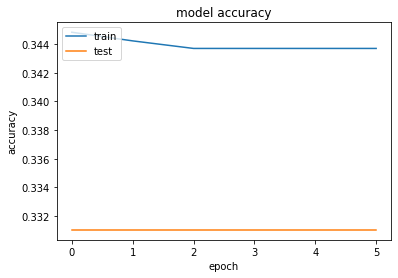

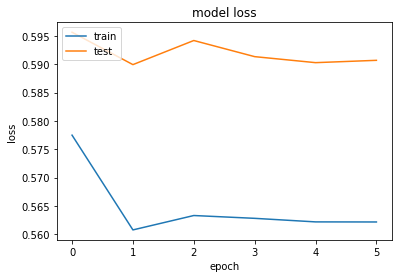

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')

## **Prediction**

In [0]:
instance = X[57]
print(instance)

The Tory leader who argues he is ensuring honesty said We do not say one thing in private and another thing in public 


In [0]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

array([[0.25826204]], dtype=float32)

## **Method2 :**

In [0]:
df =pd.read_csv('/content/drive/My Drive/Text_Mining/data.csv')

In [102]:
df.head()

,Id,Category,Tweet
0,635769805279248384,negative,Not Available
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down..."
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...
4,636100906224848896,positive,Not sure how to start your publication on iOS?...


In [103]:
df.shape

(5970, 3)

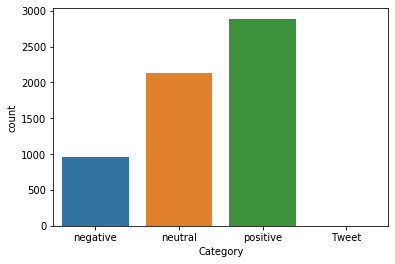

In [104]:
import seaborn as sns

sns.countplot(x='Category', data=df)

In [0]:
# remove the tweets which contains Not available

df = df[df['Tweet'] != "Not Available"]

In [0]:
def clean_tweets(tweet):
    
    # remove URL
    tweet = re.sub(r"http\S+", "", tweet)
    
    # Remove usernames
    tweet = re.sub(r"@[^\s]+[\s]?",'',tweet)
    
    # remove special characters 
    tweet = re.sub('[^ a-zA-Z0-9]', '', tweet)
    
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)
    
    return tweet

In [0]:
# Apply function to Tweet column

df['Tweet'] = df['Tweet'].apply(clean_tweets)

In [108]:
df['Tweet'].head()

1    IOS  App Transport Security Mm need to check i...
2    Mar if you have an iOS device you should downl...
3    my phone does not run on latest IOS which may ...
4    Not sure how to start your publication on iOS ...
5    Two Dollar Tuesday is here with Forklift  Quic...
Name: Tweet, dtype: object

In [0]:
X = []
sentences = list(df['Tweet'])
for sen in sentences:
    X.append(sen)

In [110]:
X[0]

'IOS  App Transport Security Mm need to check if my rd party network pod supports it '

In [0]:
y = df['Category']


y = np.array(list(map(f, y)))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [0]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [0]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [0]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [128]:
from keras.layers import Conv1D
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [129]:

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1011200   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,075,457
Trainable params: 64,257
Non-trainable params: 1,011,200
_________________________________________________________________
None


In [130]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)



Train on 3469 samples, validate on 868 samples
Epoch 1/6
3469/3469 [==============================] - 2s 708us/step - loss: 0.5790 - acc: 0.4272 - val_loss: 0.3505 - val_acc: 0.4597
Epoch 2/6
3469/3469 [==============================] - 2s 567us/step - loss: 0.3259 - acc: 0.4846 - val_loss: 0.3483 - val_acc: 0.5484
Epoch 3/6
3469/3469 [==============================] - 2s 567us/step - loss: 0.2174 - acc: 0.5324 - val_loss: 0.1622 - val_acc: 0.4735
Epoch 4/6
3469/3469 [==============================] - 2s 576us/step - loss: 0.0560 - acc: 0.5529 - val_loss: 0.0846 - val_acc: 0.4931
Epoch 5/6
3469/3469 [==============================] - 2s 575us/step - loss: -0.0825 - acc: 0.5745 - val_loss: 0.0070 - val_acc: 0.4608
Epoch 6/6
3469/3469 [==============================] - 2s 571us/step - loss: -0.1751 - acc: 0.5693 - val_loss: -0.0267 - val_acc: 0.4320


In [131]:
score = model.evaluate(X_test, y_test, verbose=1)

1085/1085 [==============================] - 0s 214us/step


In [132]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.23740280206027667
Test Accuracy: 0.4110599078890365


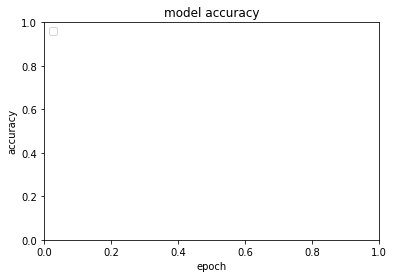

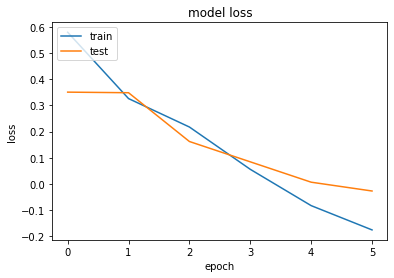

In [133]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()